### Ejercicio 1 – Estadística Descriptiva


In [1]:
#importar las librerías necesarias
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula la media aritmética (promedio)
def calcular_media_manual(x):
    return sum(x) /len(x)

#Calcula la mediana: el valor central de la lista ordenada
def calcular_mediana_manual(x):
    x_ordenado =sorted(x)
    n =len(x)
    if n %2== 0:
        return (x_ordenado[n//2 - 1] +x_ordenado[n//2])/ 2
    else:
        return x_ordenado[n//2]

# Calculala varianza muestral:
def calcular_varianza_manual(x):
    media =calcular_media_manual(x)
    suma_cuadrados =sum((xi -media) ** 2 for xi in x)
    return suma_cuadrados /(len(x) - 1)

#Calcula la desviación estándar:
def calcular_desviacion_manual(x):
    media =sum(x)/ len(x)
    suma_cuadrados = sum((xi -media) ** 2 for xi in x)
    desviacion = math.sqrt(suma_cuadrados /(len(x)- 1))
    return desviacion

#Calcula el coeficiente de variación: 
def calcular_coef_variacion_manual(x):
    media =calcular_media_manual(x)
    desviacion = calcular_desviacion_manual(x)
    return (desviacion /media) * 100

In [2]:
#Generar datos:97 ingresos normales + 3 outliers
np.random.seed(0)
ingresos_normales = np.random.normal(loc=2500, scale=300, size=97).tolist()
ingresos_outliers =[9500, 10500, 11000]

ingresos = list(ingresos_normales) + ingresos_outliers # type: ignore Para evitar el error de tipo que me sale al mezclar listas

# Cálculos manuales
media_m = calcular_media_manual(ingresos)
mediana_m = calcular_mediana_manual(ingresos)
varianza_m =calcular_varianza_manual(ingresos)
desviacion_m = calcular_desviacion_manual(ingresos)
coef_var_m = calcular_coef_variacion_manual(ingresos)

# Cálculoscon NumPy
media_np = np.mean(ingresos)
mediana_np =np.median(ingresos)
varianza_np = np.var(ingresos)
desviacion_np = np.std(ingresos)
coef_var_np = (desviacion_np /media_np) * 100

#Mostrar resultados
df = pd.DataFrame({
    "Métrica":["Media","Mediana", "Varianza", "DesviaciónEstándar", "Coef.Variación (%)"],
    "Manual": [media_m, mediana_m, varianza_m, desviacion_m, coef_var_m],
    "NumPy":[media_np, mediana_np, varianza_np, desviacion_np, coef_var_np]
})
df.round(2)

,Métrica,Manual,NumPy
0,Media,2746.00,2746.00
1,Mediana,2528.23,2528.23
2,Varianza,1899697.91,1880700.93
3,DesviaciónEstándar,1378.30,1371.39
4,Coef.Variación (%),50.19,49.94


### Ejercicio 2 – Z-score y Detección de Outliers


In [3]:
#Calcula los z-scoresmanualmente
def calcular_z_scores(datos):
    media = calcular_media_manual(datos)
    desviacion= calcular_desviacion_manual(datos)
    z_scores =[(x- media) /desviacion for x in datos]
    return z_scores

In [4]:
#Usamos los mismos ingresos que en el ejercicio 1
z_scores = calcular_z_scores(ingresos)

# Buscar valores donde|z| > 3
outliers = []
for z in z_scores:
    if abs(z) > 3:
        valor =ingresos[z_scores.index(z)]
        outliers.append((valor, z))

#Mostrar resultados
print("Valoresourliers detectados (|z| > 3):")
for valor, z in outliers:
    print(f"Valor:{valor:.2f}, Z-score: {z:.2f}")

Valoresourliers detectados (|z| > 3):
Valor:9500.00, Z-score: 4.90
Valor:10500.00, Z-score: 5.63
Valor:11000.00, Z-score: 5.99


### Ejercicio 3 – Probabilidad Frecuentista y Simulación


In [5]:
#Simula n lanzamientos de una moneda yguarda 'cara' o 'cruz'
def simular_lanzamientos(n):
    resultados =[]
    for _ in range(n):
        lanzamiento =random.choice(['cara','cruz'])
        resultados.append(lanzamiento)
    return resultados

In [6]:
# Simulamos 10.000 lanzamientos
lanzamientos =simular_lanzamientos(10000)

#Contamos cuántas veces salió cada resultado
conteo_cara= lanzamientos.count('cara')
conteo_cruz = lanzamientos.count('cruz')

# Calculamos frecuencia relativa (probabilidad estimada)
frecuencia_cara = conteo_cara/ len(lanzamientos)
frecuencia_cruz = conteo_cruz / len(lanzamientos)

#Mostrar resultados
print(f"Total de lanzamientos:{len(lanzamientos)}")
print(f"Veces que salió 'cara': {conteo_cara}")
print(f"Veces que salió cruz':{conteo_cruz}")
print(f"Frecuencia de 'cara':{frecuencia_cara:.4f}")
print(f"Frecuencia de'cruz': {frecuencia_cruz:.4f}")

Total de lanzamientos:10000
Veces que salió 'cara': 4952
Veces que salió cruz':5048
Frecuencia de 'cara':0.4952
Frecuencia de'cruz': 0.5048


### Ejercicio 4 – Distribuciones: Bernoulli, Binomial y Poisson


In [7]:
# Simula n observaciones Bernoullide probabilidad p
def simulacion_bernoulli(p, n):
    return [1 if random.random()< p else 0 for _ in range(n)]

In [8]:
# Simula la distribución Bernoulli 
bernoulli =simulacion_bernoulli(0.3, 1000)

media_ber= calcular_media_manual(bernoulli)
varianza_ber = calcular_varianza_manual(bernoulli)

print("Distribución Bernoulli (p=0.3):")
print(f"Media: {media_ber:.4f}")
print(f"Varianza:{varianza_ber:.4f}")

Distribución Bernoulli (p=0.3):
Media: 0.2980
Varianza:0.2094


In [9]:
#Simulamuestras experimentos binomiales de n_ensayos y probabilidad p
def simulacion_binomial(n_ensayos, p, muestras):
    resultados =[]
    for _ in range(muestras):
        exitos= 0
        for _ in range(n_ensayos):
            if random.random() < p:
                exitos+= 1
        resultados.append(exitos)
    return resultados

In [10]:
# Simula la distribución Binomial
binomial = simulacion_binomial(10, 0.4, 1000)

media_bin = calcular_media_manual(binomial)
varianza_bin= calcular_varianza_manual(binomial)

print("Distribución Binomial (n=10, p=0.4):")
print(f"Media:{media_bin:.4f}")
print(f"Varianza: {varianza_bin:.4f}")

Distribución Binomial (n=10, p=0.4):
Media:3.9420
Varianza: 2.3670


In [11]:
#Simula n observaciones deuna variable Poisson de parámetro lambda
def simulacion_poisson(lambd, n):
    resultados= []
    for _ in range(n):
        x = 0
        p =1
        L = math.exp(-lambd)
        while p >L:
            x += 1
            p *=random.random()
        resultados.append(x - 1)
    return resultados

In [12]:
# Simula la distribución de Poisson.
poisson =simulacion_poisson(5, 1000)

media_poi = calcular_media_manual(poisson)
varianza_poi =calcular_varianza_manual(poisson)

print("Distribución dePoisson (λ=5):")
print(f"Media: {media_poi:.4f}")
print(f"Varianza:{varianza_poi:.4f}")

Distribución dePoisson (λ=5):
Media: 4.9120
Varianza:4.7951


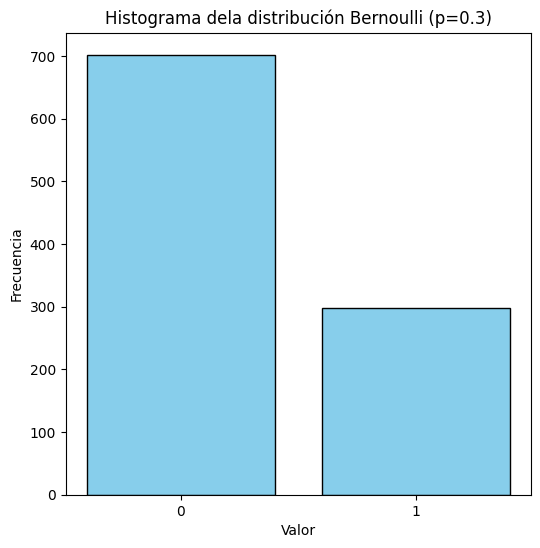

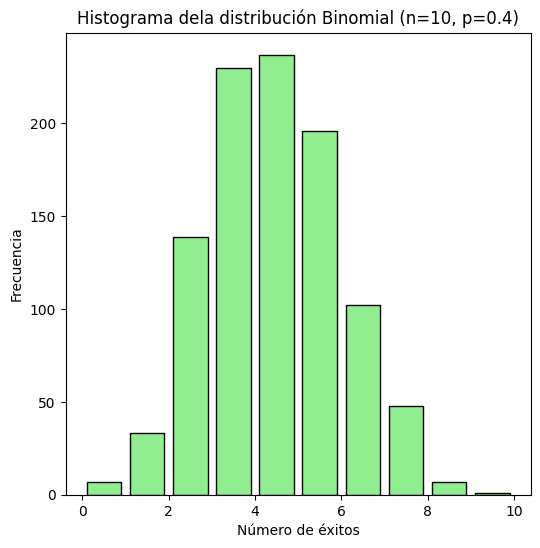

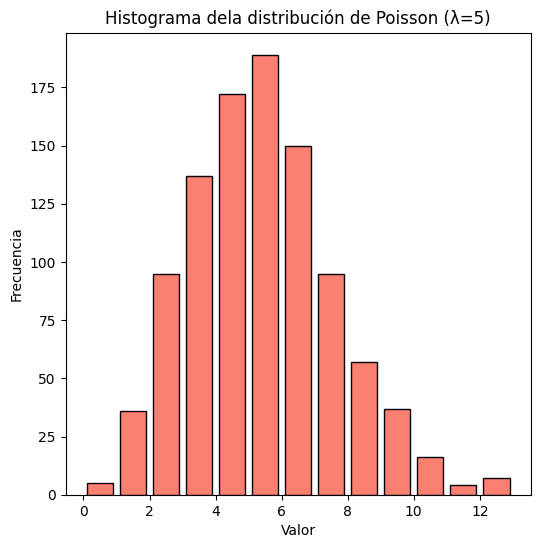

In [13]:
#Histograma deBernoulli
plt.figure(figsize=(6,6))
plt.hist(bernoulli, bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks([0, 1])
plt.title("Histograma dela distribución Bernoulli (p=0.3)")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

# Histograma de Binomial
plt.figure(figsize=(6,6))
plt.hist(binomial, bins=range(min(binomial), max(binomial)+2), rwidth=0.8, color='lightgreen', edgecolor='black')
plt.title("Histograma dela distribución Binomial (n=10, p=0.4)")
plt.xlabel("Número de éxitos")
plt.ylabel("Frecuencia")
plt.show()

#Histograma dePoisson
plt.figure(figsize=(6,6))
plt.hist(poisson, bins=range(min(poisson), max(poisson)+2), rwidth=0.8, color='salmon', edgecolor='black')
plt.title("Histograma dela distribución de Poisson (λ=5)")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

### Ejercicio 5 – Intervalo de confianza para la media (95%)

In [14]:
#Calcula el margen de error para un intervalo de confianza
def calcular_margen_error(std, n, z):
    return z *(std /math.sqrt(n))

In [15]:
# Simulamos una muestra de 50 edades (por ejemplo, entre 18 y 88 años)
random.seed(0)
edades = [random.randint(18, 88)for _ in range(50)]

#Calculamos la media, desviación estándar y margen de error con las funciones previas
media_muestra = calcular_media_manual(edades)
desviacion_muestra =calcular_desviacion_manual(edades)
z = 1.96  #para 95% de confianza
margen = calcular_margen_error(desviacion_muestra,len(edades), z)

#Calculamos el intervalo de confianza
limite_inferior= media_muestra - margen
limite_superior = media_muestra + margen

# Mostramos resultados por pantalla
print("Edades simuladas (50):",edades)
print(f"Media muestral: {media_muestra:.2f}")
print(f"Desviación estándar muestral:{desviacion_muestra:.2f}")
print(f"Intervalo de confianza al 95%: ({limite_inferior:.2f}, {limite_superior:.2f})")

Edades simuladas (50): [67, 71, 23, 51, 83, 80, 69, 56, 79, 63, 45, 82, 35, 54, 35, 30, 50, 86, 36, 57, 30, 27, 60, 78, 30, 63, 73, 58, 44, 88, 79, 74, 84, 51, 25, 88, 19, 29, 69, 18, 81, 60, 49, 59, 26, 42, 46, 48, 36, 87]
Media muestral: 55.46
Desviación estándar muestral:21.22
Intervalo de confianza al 95%: (49.58, 61.34)


### Ejercicio 6 – Prueba de hipótesis para proporciones

In [16]:
#H0 La proporciónreal es igual a 0.9. Hipotesis 0
#H1 La proporción real es menor que 0.9. Hipotesisalternativa
# CDF de la normal estándar usando fórmula de aproximación
def cdf_normal(z):
    return 0.5 * (1+ math.erf(z / math.sqrt(2)))

#Calcula el estadístico z para proporciones
def estadistico_z(p_muestral, p_hipotesis, n):
    numerador = p_muestral -p_hipotesis
    denominador = math.sqrt(p_hipotesis * (1 - p_hipotesis) / n)
    return numerador /denominador

In [17]:
#Datos
n = 400                    # tamaño de muestra
x = 344                    # personasvacunadas
p0 = 0.9                   #proporción en hipótesis nula
p_hat =x / n              #proporción muestral

#Calcular estadístico z
z = estadistico_z(p_hat,p0, n)

# Calcular valor-p usando CDF 
valor_p =cdf_normal(z)

#Mostrarresultados
print(f"Proporción muestral:{p_hat:.4f}")
print(f"Estadístico z:{z:.4f}")
print(f"Valor-p (aproximado):{valor_p:.4f}")

#Conclusión con nivel de significancia de 0.05
if valor_p< 0.05:
    print("Se rechaza H0:hay evidencia de que la proporción reales menor al 90%")
else:
    print("No se rechaza H0: no hay evidencia suficiente para decir que es menor al 90%.")

Proporción muestral:0.8600
Estadístico z:-2.6667
Valor-p (aproximado):0.0038
Se rechaza H0:hay evidencia de que la proporción reales menor al 90%


### Ejercicio 7 – Correlación de Pearson desde cero

In [18]:
# Define una funciónpara calcular la correlación de Pearson
def correlacion_pearson(x, y):
    n = len(x)
    media_x =calcular_media_manual(x)
    media_y =calcular_media_manual(y)
    sum_xy = sum((x[i] -media_x) * (y[i] -media_y) for i in range(n))
    desv_x = calcular_desviacion_manual(x)
    desv_y = calcular_desviacion_manual(y)
    return sum_xy / ((n - 1) *desv_x * desv_y)

In [19]:
#Simulamos dos ariables relacionadas linealmente (con algo de ruido) y calculamos la correlación de Pearson

random.seed(0)
x = [i for i in range(1, 51)]  # Variable x: 1, 2, ..., 50
y = [2 * xi+ random.uniform(-15, 15) for xi in x]#y = 2x + ruido aleatorio

# Calculamos el coeficiente de correlación de Pearson con la función manual
r =correlacion_pearson(x, y)

# Mostramos resultados por pantalla
print("Variable X:", x)
print("Variable Y:", [round(yi, 2) for yi in y])
print(f"Coeficiente de correlación de Pearson:{r:.4f}")

Variable X: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Variable Y: [12.33, 11.74, 3.62, 0.77, 10.34, 9.15, 22.51, 10.1, 17.3, 22.5, 34.24, 24.14, 19.46, 35.67, 33.55, 24.52, 46.29, 50.48, 47.31, 52.06, 36.3, 50.89, 57.97, 53.52, 49.16, 40.02, 52.03, 59.33, 70.39, 74.0, 61.31, 74.96, 58.81, 77.15, 71.46, 57.42, 80.59, 72.96, 87.75, 85.04, 67.03, 83.81, 97.03, 80.32, 84.76, 103.11, 84.73, 98.03, 90.16, 114.03]
Coeficiente de correlación de Pearson:0.9608


### Ejercicio 8 – Correlación de Spearman desde cero

In [20]:
#Asignarangos simples (sin empates)
def calcular_rangos(lista):
    n = len(lista)
    rangos =[0] * n
    # Crear lista con valores y susíndices
    lista_ordenada = sorted([[lista[i], i] for i in range(n)])
    
    rango_actual = 1
    for par in lista_ordenada:
        valor = par[0]
        indice_original = par[1]
        rangos[indice_original] =rango_actual
        rango_actual += 1
    return rangos

#Correlación de Spearman (condiferencia de rangos)
def correlacion_spearman(x, y):
    rx = calcular_rangos(x)
    ry =calcular_rangos(y)
    n = len(x)
    suma_d2 = 0
    for i in range(n):
        diferencia = rx[i] - ry[i]
        suma_d2+= diferencia ** 2
    return 1 - (6 * suma_d2)/ (n * (n**2- 1))

In [21]:
random.seed(0)

#Variable x enorden creciente
x = [i + 1 for i in range(30)]

# Variable ycon crecimiento cuadrático y algo de ruido
y =[xi ** 2 + random.uniform(-50, 50) for xi in x]

# Calcular correlación de Spearman
rho= correlacion_spearman(x, y)

#Mostrar resultados
print("Variable X:", x)
print("VariableY:", [round(valor, 2) for valor in y])
print(f"Coeficiente de correlación de Spearman: {rho:.4f}")

Variable X: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
VariableY: [35.44, 29.8, 1.06, -8.11, 26.13, 26.49, 77.38, 44.33, 78.66, 108.34, 161.81, 144.47, 147.18, 221.58, 236.84, 231.05, 329.97, 372.28, 392.02, 440.22, 422.01, 506.98, 568.88, 594.4, 622.21, 636.07, 722.42, 795.09, 882.3, 946.66]
Coeficiente de correlación de Spearman: 0.9858


### Ejercicio 9 – Correlación de Kendall desde cero

In [22]:
#Calcular tau de Kendall
def kendall_tau(x, y):
    n =len(x)
    concordantes= 0
    discordantes = 0

    for i in range(n):
        for j in range(i + 1, n):
            # Comparar pares (xi, yi) y (xj, yj)
            dx =x[i] - x[j]
            dy= y[i] - y[j]
            producto = dx * dy
            if producto > 0:
                concordantes+= 1
            elif producto < 0:
                discordantes += 1
            #Si producto == 0, no cuenta (pares empatados)

    total_pares =n * (n - 1) / 2
    return (concordantes - discordantes) / total_pares

In [23]:
random.seed(0)

#Simulamos dos variables sinrelación clara
x = [random.randint(1, 100) for _ in range(30)]
y =[random.randint(1, 100) for _ in range(30)]

# Calcular tau de Kendall
tau = kendall_tau(x, y)

#Mostrar resultados
print("VariableX:", x)
print("Variable Y:", y)
print(f"Coeficiente de correlación de Kendall:{tau:.4f}")

VariableX: [50, 98, 54, 6, 34, 66, 63, 52, 39, 62, 46, 75, 28, 65, 18, 37, 18, 97, 13, 80, 33, 69, 91, 78, 19, 40, 13, 94, 10, 88]
Variable Y: [43, 61, 72, 13, 46, 56, 41, 79, 82, 27, 71, 62, 57, 67, 34, 8, 71, 2, 12, 93, 52, 91, 86, 81, 1, 79, 64, 43, 32, 94]
Coeficiente de correlación de Kendall:0.2805


### Ejercicio 10 – Análisis de una base de datos real. Análisis comparativo de vino blanco

In [24]:
# Cargarlos datos desde CSV. Se adjunta que el archivo "winequality-white.csv" está en el mismo directorio
vino_blanco =pd.read_csv("winequality-white.csv", sep=";")

# Mostrar primeras filas vino blanco
vino_blanco.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
#Estadísticadescriptiva para vino blanco
# Lista para guardar los resultados
resultados =[]

# Recorrer todas las columnas del dataset
for col in vino_blanco.columns:
    datos = vino_blanco[col].tolist()
    
    media = round(calcular_media_manual(datos), 2)
    varianza =round(calcular_varianza_manual(datos), 2)
    desviacion = round(calcular_desviacion_manual(datos), 2)
    mediana =round(calcular_mediana_manual(datos), 2)
    coef_var= round(calcular_coef_variacion_manual(datos), 2)
    
    resultados.append({
        "Variable": col,
        "Media":media,
        "Mediana": mediana,
        "Varianza": varianza,
        "Desv. Est.": desviacion,
        "Coef. Variación (%)":coef_var
    })

# Crear DataFrame
df_estadisticas_blanco= pd.DataFrame(resultados)

#Mostrar el DataFrame
df_estadisticas_blanco

,Variable,Media,Mediana,Varianza,Desv. Est.,Coef. Variación (%)
0,fixed acidity,6.85,6.80,0.71,0.84,12.31
1,volatile acidity,0.28,0.26,0.01,0.10,36.23
2,citric acid,0.33,0.32,0.01,0.12,36.21
3,residual sugar,6.39,5.20,25.73,5.07,79.36
4,chlorides,0.05,0.04,0.00,0.02,47.73
5,free sulfur dioxide,35.31,34.00,289.24,17.01,48.17
6,total sulfur dioxide,138.36,134.00,1806.09,42.50,30.72
7,density,0.99,0.99,0.00,0.00,0.30
8,pH,3.19,3.18,0.02,0.15,4.74
9,sulphates,0.49,0.47,0.01,0.11,23.30


In [26]:
#Crear matriz decorrelación manual
columnas = vino_blanco.columns.tolist()
matriz_correlacion =[]

for col1 in columnas:
    fila =[]
    x = vino_blanco[col1].tolist()
    for col2 in columnas:
        y = vino_blanco[col2].tolist()

        media_x = calcular_media_manual(x)
        media_y =calcular_media_manual(y)
        desv_x = calcular_desviacion_manual(x)
        desv_y= calcular_desviacion_manual(y)

        suma_producto = sum((x[i] - media_x)* (y[i] - media_y) for i in range(len(x)))
        r =suma_producto / ((len(x) - 1) *desv_x * desv_y)
        fila.append(round(r, 4))

    matriz_correlacion.append(fila)

# Crear DataFrame
df_correlacion_manual =pd.DataFrame(matriz_correlacion, columns=columnas, index=columnas)

#Mostrar la matriz
df_correlacion_manual

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0000,-0.0227,0.2892,0.0890,0.0231,-0.0494,0.0911,0.2653,-0.4259,-0.0171,-0.1209,-0.1137
volatile acidity,-0.0227,1.0000,-0.1495,0.0643,0.0705,-0.0970,0.0893,0.0271,-0.0319,-0.0357,0.0677,-0.1947
citric acid,0.2892,-0.1495,1.0000,0.0942,0.1144,0.0941,0.1211,0.1495,-0.1637,0.0623,-0.0757,-0.0092
residual sugar,0.0890,0.0643,0.0942,1.0000,0.0887,0.2991,0.4014,0.8390,-0.1941,-0.0267,-0.4506,-0.0976
chlorides,0.0231,0.0705,0.1144,0.0887,1.0000,0.1014,0.1989,0.2572,-0.0904,0.0168,-0.3602,-0.2099
free sulfur dioxide,-0.0494,-0.0970,0.0941,0.2991,0.1014,1.0000,0.6155,0.2942,-0.0006,0.0592,-0.2501,0.0082
total sulfur dioxide,0.0911,0.0893,0.1211,0.4014,0.1989,0.6155,1.0000,0.5299,0.0023,0.1346,-0.4489,-0.1747
density,0.2653,0.0271,0.1495,0.8390,0.2572,0.2942,0.5299,1.0000,-0.0936,0.0745,-0.7801,-0.3071
pH,-0.4259,-0.0319,-0.1637,-0.1941,-0.0904,-0.0006,0.0023,-0.0936,1.0000,0.1560,0.1214,0.0994
sulphates,-0.0171,-0.0357,0.0623,-0.0267,0.0168,0.0592,0.1346,0.0745,0.1560,1.0000,-0.0174,0.0537


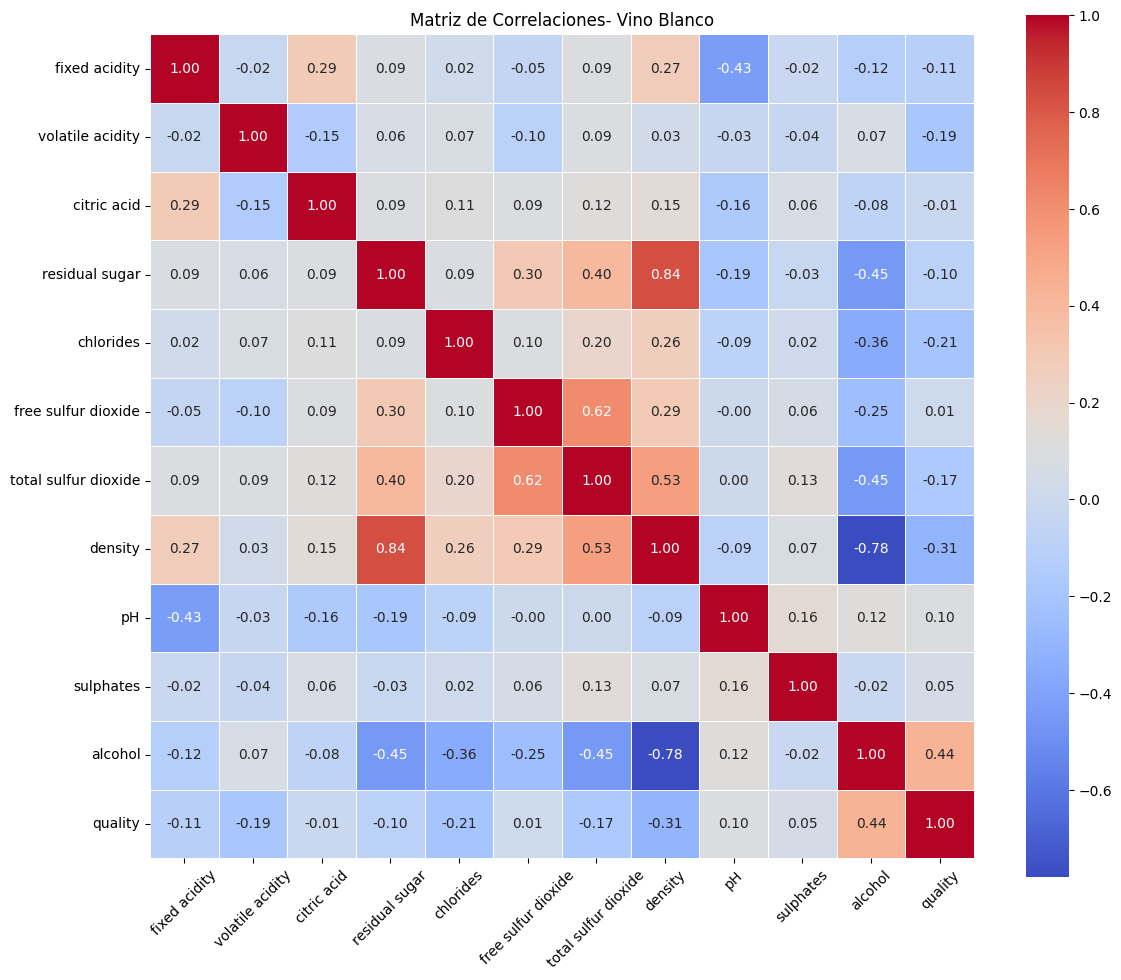

In [27]:
#Dibujarheatmap de la matriz de correlación
plt.figure(figsize=(12, 10)) # tamaño del gráfico

sns.heatmap(df_correlacion_manual, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

plt.title("Matriz de Correlaciones- Vino Blanco")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

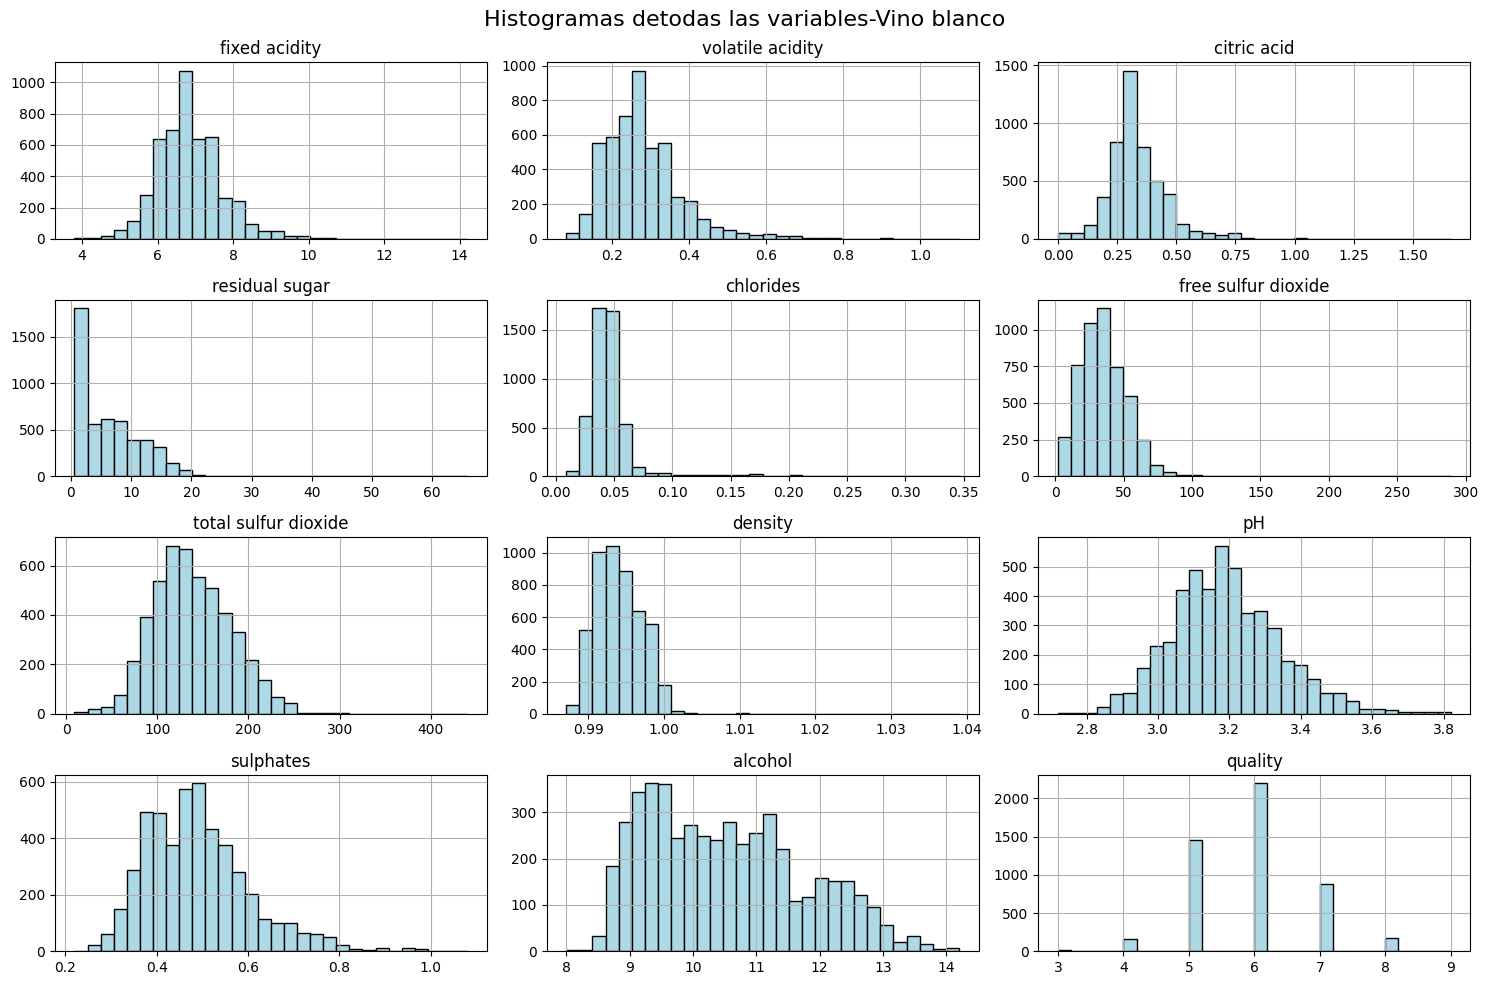

In [28]:
#Histogramasde todas las variables
vino_blanco.hist(bins=30, figsize=(15, 10), color="lightblue", edgecolor="black")
plt.suptitle("Histogramas detodas las variables-Vino blanco", fontsize=16)
plt.tight_layout()
plt.show()

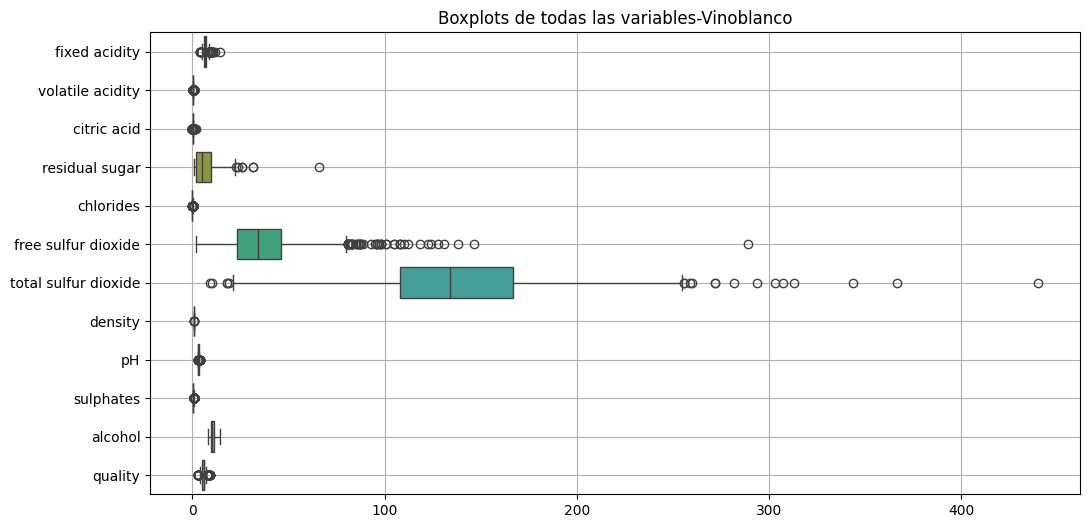

In [29]:
#Boxplots detodas las variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=vino_blanco, orient="h")
plt.title("Boxplots de todas las variables-Vinoblanco")
plt.grid(True)
plt.show()

In [30]:
#Mostrar outliers
for columna in vino_blanco.columns:
    datos= vino_blanco[columna].tolist()
    z_scores =calcular_z_scores(datos)

    outliers =[]
    for i in range(len(z_scores)):
        if abs(z_scores[i])> 3:
            outliers.append((datos[i], z_scores[i]))

    if outliers:
        print(f"\nOutliersdetectados en la columna '{columna}' (|z| > 3):")
        for valor, z in outliers:
            print(f"Valor:{valor:.2f}, Z-score: {z:.2f}")


Outliersdetectados en la columna 'fixed acidity' (|z| > 3):
Valor:9.80, Z-score: 3.49
Valor:9.80, Z-score: 3.49
Valor:10.20, Z-score: 3.96
Valor:10.00, Z-score: 3.73
Valor:10.30, Z-score: 4.08
Valor:9.40, Z-score: 3.02
Valor:9.80, Z-score: 3.49
Valor:9.60, Z-score: 3.25
Valor:9.80, Z-score: 3.49
Valor:9.70, Z-score: 3.37
Valor:9.40, Z-score: 3.02
Valor:10.30, Z-score: 4.08
Valor:9.60, Z-score: 3.25
Valor:9.70, Z-score: 3.37
Valor:9.40, Z-score: 3.02
Valor:9.60, Z-score: 3.25
Valor:10.70, Z-score: 4.56
Valor:10.70, Z-score: 4.56
Valor:9.80, Z-score: 3.49
Valor:14.20, Z-score: 8.70
Valor:9.80, Z-score: 3.49
Valor:9.60, Z-score: 3.25
Valor:9.40, Z-score: 3.02
Valor:9.40, Z-score: 3.02
Valor:10.00, Z-score: 3.73
Valor:10.00, Z-score: 3.73
Valor:9.90, Z-score: 3.61
Valor:9.50, Z-score: 3.13
Valor:9.50, Z-score: 3.13
Valor:11.80, Z-score: 5.86
Valor:9.40, Z-score: 3.02
Valor:9.80, Z-score: 3.49
Valor:9.90, Z-score: 3.61
Valor:9.40, Z-score: 3.02
Valor:9.40, Z-score: 3.02
Valor:9.40, Z-score

In [31]:
print("\nCONCLUSIONESSOBRE EL VINO BLANCO:")
print("- El alcoholtiene correlación positiva con la calidad del vino.")
print("- La densidad y el alcohol están inversamente relacionados")
print("- La variable 'residual sugar' presenta varios valores atípicos.")
print("- La calidad no mejora necesariamente con más azúcar.")
print("- El pH estárelacionado con la acidez: menor pH, mayor acidez.")
print("- Algunas variables como 'total sulfur dioxide' también tienen valores extremos.")
print("- La calidad del vino parece influenciada sobre todo por el alcohol")


CONCLUSIONESSOBRE EL VINO BLANCO:
- El alcoholtiene correlación positiva con la calidad del vino.
- La densidad y el alcohol están inversamente relacionados
- La variable 'residual sugar' presenta varios valores atípicos.
- La calidad no mejora necesariamente con más azúcar.
- El pH estárelacionado con la acidez: menor pH, mayor acidez.
- Algunas variables como 'total sulfur dioxide' también tienen valores extremos.
- La calidad del vino parece influenciada sobre todo por el alcohol
